## OUTLIER USING QUANTILES

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df = df[['price','minimum_nights']]
df.head()

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10


In [3]:
df['price_per_night'] = df['price']/df['minimum_nights']
df.head()

,price,minimum_nights,price_per_night
0,149,1,149.0
1,225,1,225.0
2,150,3,50.0
3,89,1,89.0
4,80,10,8.0


In [4]:
df['price_per_night'].describe()

count    48895.000000
mean        70.174247
std        157.620388
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: price_per_night, dtype: float64

In [5]:
min,max = df['price_per_night'].quantile([0.02,0.98])
min,max

(1.6377021276595745, 300.0)

In [6]:
df[(df['price_per_night']>min) & (df['price_per_night']<max)]

,price,minimum_nights,price_per_night
0,149,1,149.000000
1,225,1,225.000000
2,150,3,50.000000
3,89,1,89.000000
4,80,10,8.000000
...,...,...,...
48890,70,2,35.000000
48891,40,4,10.000000
48892,115,10,11.500000
48893,55,1,55.000000


## Z-Score and STD

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df1 = pd.read_csv('bhp.csv')
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [9]:
min,max = df1['price_per_sqft'].quantile([0.001,0.999])
min,max

(1366.184, 50959.36200000099)

In [10]:
df1 = df1[(df1['price_per_sqft']>min) & (df1['price_per_sqft']<max)]
df2 = df1
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [11]:
df1['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [12]:
lower,upper = df1['price_per_sqft'].mean() - 4*df1['price_per_sqft'].std() , df1['price_per_sqft'].mean() + 4*df1['price_per_sqft'].std()
lower,upper

(-9900.429065502582, 23227.73653589432)

In [13]:
df1 = df1[(df1['price_per_sqft']>lower) & (df1['price_per_sqft']<upper)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [14]:
df1['price_per_sqft'].std()

3487.6700047355785

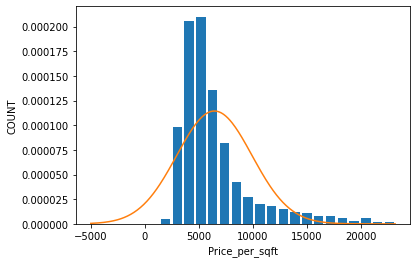

In [15]:
plt.hist(df1['price_per_sqft'],bins=20,rwidth=0.8,density = True)
plt.xlabel('Price_per_sqft')
plt.ylabel('COUNT')

rng = np.arange(-5000,df1['price_per_sqft'].max(),100)
plt.plot(rng, norm.pdf(rng,df1['price_per_sqft'].mean(),df1['price_per_sqft'].std()))
plt.show()

In [16]:
df2['Z-Score'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z-Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


## Remove Outlier Using Inter Quantile Range

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df3 =pd.read_csv('height_weight.csv')
df3

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [19]:
df3["height"].describe()
IQRH25 = df3["height"].quantile(0.25)
IQRH75 = df3["height"].quantile(0.75)
IQRH = IQRH75 -IQRH25
print(IQRH75,IQRH,IQRH25)

69.1742617268347 5.668641245615746 63.505620481218955


In [20]:
df3["weight"].describe()
IQRW25 = df3["weight"].quantile(0.25)
IQRW75 = df3["weight"].quantile(0.75)
IQRW = IQRW75 -IQRW25
print(IQRW75,IQRW,IQRW25)

187.16952486868348 51.35147356318197 135.8180513055015


In [21]:
LOWERW = IQRW25 - 1.5*IQRW
UPPERW = IQRW75 + 1.5*IQRW
LOWERH = IQRH25 - 1.5*IQRH
UPPERH = IQRH75 + 1.5*IQRH
print(LOWERH,LOWERW,UPPERH,UPPERW)
df3[(df3.height<LOWERH)|(df3.height>UPPERH)|(df3.weight<LOWERW)|(df3.weight>UPPERW)]

55.00265861279534 58.79084096072856 77.67722359525831 264.19673521345646


,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [22]:
df3 = df3[(df3['weight']>LOWERW) &(df3['weight']<UPPERW) & (df3["height"]>LOWERH)&(df3["height"]<UPPERH)]
df3

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
